In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('C:/Users/kosuke/dataset/mushroom.csv')

In [3]:
df.head()

,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat,Class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
Cap-shape                   8124 non-null object
Cap-surface                 8124 non-null object
Cap-color                   8124 non-null object
Bruises                     8124 non-null object
Odor                        8124 non-null object
Gill-attachment             8124 non-null object
Gill-spacing                8124 non-null object
Gill-size                   8124 non-null object
Gill-color                  8124 non-null object
Stalk-shape                 8124 non-null object
Stalk-root                  8124 non-null object
Stalk-surface-above-ring    8124 non-null object
Stalk-surface-below-ring    8124 non-null object
Stalk-color-above-ring      8124 non-null object
Stalk-color-below-ring      8124 non-null object
Veil-type                   8124 non-null object
Veil-color                  8124 non-null object
Ring-number                 8124 non-null object
Ring-type  

In [6]:
df.isnull().sum()

Cap-shape                   0
Cap-surface                 0
Cap-color                   0
Bruises                     0
Odor                        0
Gill-attachment             0
Gill-spacing                0
Gill-size                   0
Gill-color                  0
Stalk-shape                 0
Stalk-root                  0
Stalk-surface-above-ring    0
Stalk-surface-below-ring    0
Stalk-color-above-ring      0
Stalk-color-below-ring      0
Veil-type                   0
Veil-color                  0
Ring-number                 0
Ring-type                   0
Spore-print-color           0
Population                  0
Habitat                     0
Class                       0
dtype: int64

In [7]:
df['Stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: Stalk-root, dtype: int64

In [8]:
df['Class'].value_counts()

e    4208
p    3916
Name: Class, dtype: int64

In [9]:
df['Stalk-root'] = df['Stalk-root'].map({
    '?': np.nan,
    'b':'b',
    'e':'e',
    'c':'c',
    'r':'r'
})

In [14]:
df.isnull().sum()

Cap-shape                      0
Cap-surface                    0
Cap-color                      0
Bruises                        0
Odor                           0
Gill-attachment                0
Gill-spacing                   0
Gill-size                      0
Gill-color                     0
Stalk-shape                    0
Stalk-root                  2480
Stalk-surface-above-ring       0
Stalk-surface-below-ring       0
Stalk-color-above-ring         0
Stalk-color-below-ring         0
Veil-type                      0
Veil-color                     0
Ring-number                    0
Ring-type                      0
Spore-print-color              0
Population                     0
Habitat                        0
Class                          0
dtype: int64

# Preprocessing

In [11]:
mr = pd.get_dummies(df, drop_first=True, columns=["Cap-shape","Cap-surface","Cap-color","Bruises","Odor","Gill-attachment",
                                                       "Gill-color","Stalk-shape","Stalk-root","Stalk-surface-above-ring","Stalk-surface-below-ring",
                                                       "Stalk-color-above-ring","Stalk-color-below-ring","Veil-type","Veil-color","Ring-type",
                                                       "Spore-print-color","Habitat"],dummy_na=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
column = ['Gill-spacing','Gill-size','Ring-number','Population']
for i in column:
    select = mr[i]
    le.fit(select)
    column_le =le.transform(select)
    mr[i] = pd.Series(column_le).astype('category')

In [23]:
mr.head()

,Gill-spacing,Gill-size,Ring-number,Population,Class,Cap-shape_c,Cap-shape_f,Cap-shape_k,Cap-shape_s,Cap-shape_x,...,Spore-print-color_w,Spore-print-color_y,Spore-print-color_nan,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w,Habitat_nan
0,0,1,1,3,p,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,2,e,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2,e,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,1,3,p,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,e,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [34]:
mr.isnull().sum()

Gill-spacing                  0
Gill-size                     0
Ring-number                   0
Population                    0
Class                         0
Cap-shape_c                   0
Cap-shape_f                   0
Cap-shape_k                   0
Cap-shape_s                   0
Cap-shape_x                   0
Cap-shape_nan                 0
Cap-surface_g                 0
Cap-surface_s                 0
Cap-surface_y                 0
Cap-surface_nan               0
Cap-color_c                   0
Cap-color_e                   0
Cap-color_g                   0
Cap-color_n                   0
Cap-color_p                   0
Cap-color_r                   0
Cap-color_u                   0
Cap-color_w                   0
Cap-color_y                   0
Cap-color_nan                 0
Bruises_t                     0
Bruises_nan                   0
Odor_c                        0
Odor_f                        0
Odor_l                        0
                             ..
Stalk-co

In [24]:
mr.shape

(8124, 108)

# Encoding

In [26]:
X = pd.DataFrame()
X = mr.drop(['Class'], 1)
y = mr['Class']

In [28]:
X.describe()

,Cap-shape_c,Cap-shape_f,Cap-shape_k,Cap-shape_s,Cap-shape_x,Cap-shape_nan,Cap-surface_g,Cap-surface_s,Cap-surface_y,Cap-surface_nan,...,Spore-print-color_w,Spore-print-color_y,Spore-print-color_nan,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w,Habitat_nan
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.0,...,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0
mean,0.000492,0.387986,0.101920,0.003939,0.450025,0.0,0.000492,0.314623,0.399311,0.0,...,0.293944,0.005908,0.0,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634,0.0
std,0.022185,0.487321,0.302562,0.062641,0.497527,0.0,0.022185,0.464394,0.489787,0.0,...,0.455595,0.076644,0.0,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.0,...,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


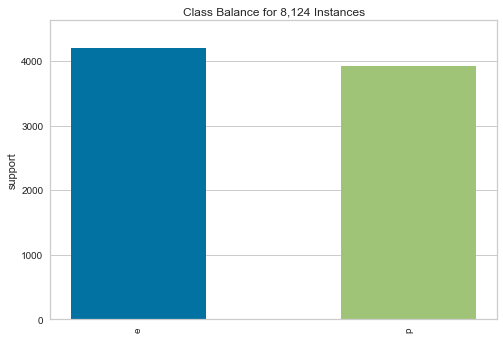

In [29]:
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

In [31]:
from sklearn.preprocessing import StandardScaler
X = np.array(X)
y = np.array(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# LogisticRegression

In [33]:
from sklearn.model_selection import train_test_split
#Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, 
                                                    shuffle=True, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [53]:
from sklearn.model_selection import GridSearchCV
tuning_parm = [
    {'C': [0.01,0.1, 1, 10, 100]}
]

clf_lr = GridSearchCV(LogisticRegression(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [54]:
clf_lr.fit(X_train,y_train)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_micro', verbose=0)

In [55]:
result_df = pd.DataFrame.from_dict(clf_lr.cv_results_)
col = ['mean_test_score', 'params']
result_score = result_df[col]
result_score.sort_values(by=['mean_test_score'],  ascending=False)

,mean_test_score,params
3,1.000000,{'C': 10}
4,1.000000,{'C': 100}
2,0.999672,{'C': 1}
0,0.999508,{'C': 0.01}
1,0.999508,{'C': 0.1}


In [62]:
clf_lr.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
log_reg=LogisticRegression(C=10)

In [63]:
from sklearn.model_selection import cross_val_score
log_reg.fit(X_train,y_train)
cv_score = cross_val_score(log_reg, X_scaled, y, cv=5, scoring="accuracy")
pd.DataFrame(cv_score).rename(columns={0: '正解率'})

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

,正解率
0,0.881919
1,1.000000
2,1.000000
3,1.000000
4,0.743227


In [64]:
print("cross_validation："+str(cv_score.mean()))

cross_validation：0.9250290840346826


C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


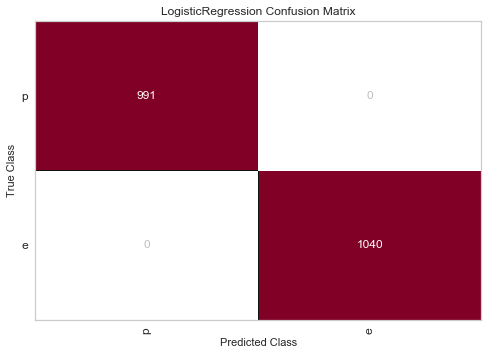

In [60]:
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(log_reg, classes=['p','e'])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

# SVM

In [46]:
from sklearn.svm import SVC

In [47]:
tuning_parm = [
    {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}
]

clf_svm = GridSearchCV(SVC(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [48]:
clf_svm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}, {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']}, {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_micro', verbose=0)

In [50]:
result_df = pd.DataFrame.from_dict(clf_svm.cv_results_)
col = ['mean_test_score', 'params']
result_score = result_df[col]
result_score.sort_values(by=['mean_test_score'],  ascending=False)

,mean_test_score,params
27,1.000000,"{'C': 100, 'kernel': 'linear'}"
21,1.000000,"{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}"
19,1.000000,"{'C': 10, 'gamma': 0.01, 'kernel': 'poly'}"
18,1.000000,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}"
15,1.000000,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}"
25,1.000000,"{'C': 1, 'kernel': 'linear'}"
12,1.000000,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}"
11,1.000000,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}"
22,1.000000,"{'C': 100, 'gamma': 0.01, 'kernel': 'poly'}"
26,1.000000,"{'C': 10, 'kernel': 'linear'}"


In [66]:
clf_svm.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
svm = SVC(C=100, gamma=0.001, kernel='rbf')
svm.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
svm_score = cross_val_score(svm, X_scaled, y, cv=5, scoring="accuracy")
pd.DataFrame(svm_score).rename(columns={0: '正解率'})

,正解率
0,0.842558
1,1.000000
2,1.000000
3,1.000000
4,0.615764


In [70]:
print("cross_validation："+str(cv_score.mean()))

cross_validation：0.9250290840346826


# RandomForest

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [72]:
parameters = {
    "n_estimators":[i for i in range(10,100,10)],
    "criterion":["gini","entropy"],
    "max_depth":[i for i in range(1,10,1)],
     'min_samples_split': [2, 4, 10,12,16],
}
clf_forest = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='f1_micro', return_train_score=True)

In [73]:
clf_forest.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [2, 4, 10, 12, 16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_micro', verbose=0)

In [74]:
result_df = pd.DataFrame.from_dict(clf_forest.cv_results_)
col = ['mean_test_score', 'params']
result_score = result_df[col]
result_score.sort_values(by=['mean_test_score'], ascending=False)

,mean_test_score,params
404,1.000000,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
791,1.000000,"{'criterion': 'entropy', 'max_depth': 9, 'min_..."
388,1.000000,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
392,1.000000,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
393,1.000000,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
394,1.000000,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
398,1.000000,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
400,1.000000,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
402,1.000000,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
403,1.000000,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."


In [76]:
clf_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
svm_score = cross_val_score(forest, X_scaled, y, cv=5, scoring="accuracy")
pd.DataFrame(svm_score).rename(columns={0: '正解率'})

,正解率
0,0.843788
1,1.000000
2,0.987692
3,1.000000
4,0.794335


In [79]:
print("cross_validation："+str(cv_score.mean()))

cross_validation：0.9250290840346826
